PHASE ONE

In [2]:
import sys
print(sys.executable)

/home/spacetime/student-dropout-predictor/.venv/bin/python


In [ ]:
#!pip install pandas numpy matplotlib seaborn
#if you're not using a virtual environment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully")

Libraries imported successfully


In [ ]:
# Loading the dataset

file_path = '../data/students_dropout_academic_success.csv'
try:
    df = pd.read_csv(file_path, sep=',')
    print("Data loaded successfully")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please make sure your CSV file is in the 'data' folder.")
except Exception as e:   
    print(f"Trying comma separator... {e}")
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully with comma separator")
        print(f"Dataset shape: {df.shape}")
    except Exception as e2:
        print(f"Failed to load data: {e2}")

TARGET_COL = 'target'

Data loaded successfully
Dataset shape: (4424, 37)


In [6]:
print("First 5 rows of the data:")
display(df.head())

print("\nData Info:")
df.info()

print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the data:


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification       

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'count': missing_values, 'percent': missing_percent})
missing_df = missing_df[missing_df['count'] > 0].sort_values(by='percent', ascending=False)

if missing_df.empty:
    print("No missing values found.")
else:
    print("\nMissing Values:")
    display(missing_df)

Great! No missing values found.


Unique values in 'target': ['Dropout' 'Graduate' 'Enrolled']


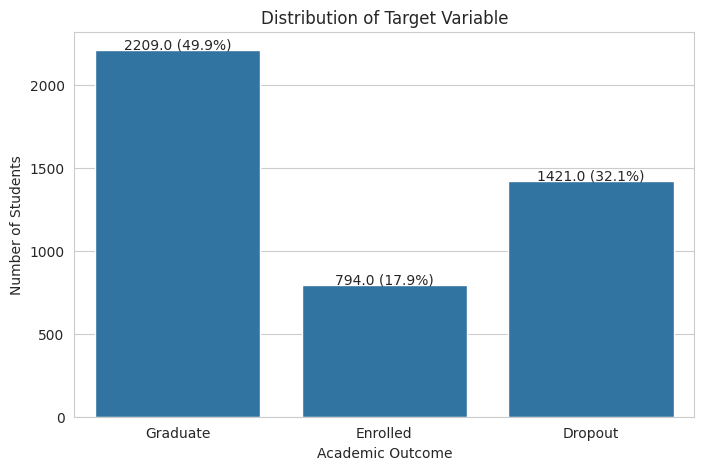

In [8]:
print(f"Unique values in '{TARGET_COL}': {df[TARGET_COL].unique()}")

# Plot for the distribution of the Target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=TARGET_COL, data=df, order=['Graduate', 'Enrolled', 'Dropout'])
plt.title('Distribution of Target Variable')
plt.xlabel('Academic Outcome')
plt.ylabel('Number of Students')

# Adding percentages
total = len(df[TARGET_COL])
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            f'{height} ({height/total:.1%})',
            ha="center")
plt.show()

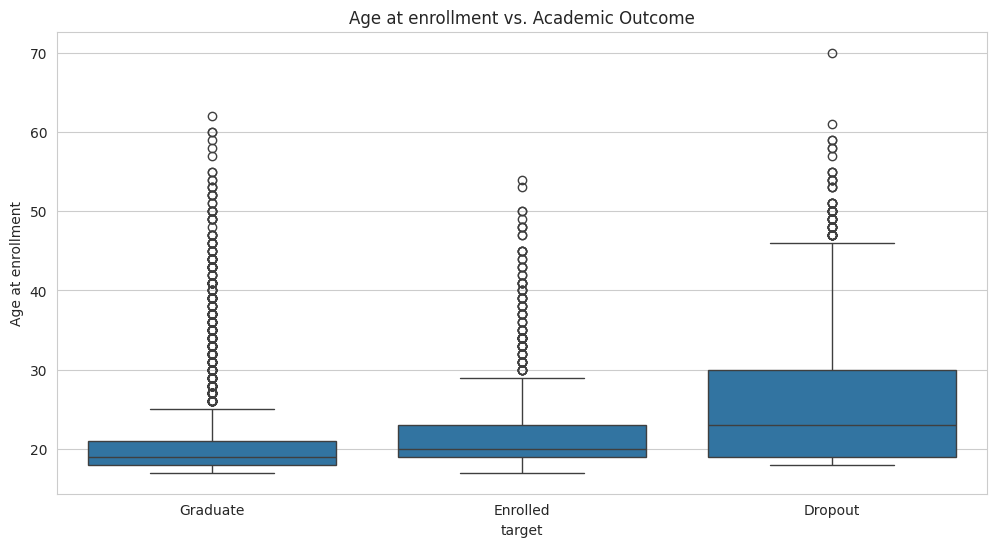

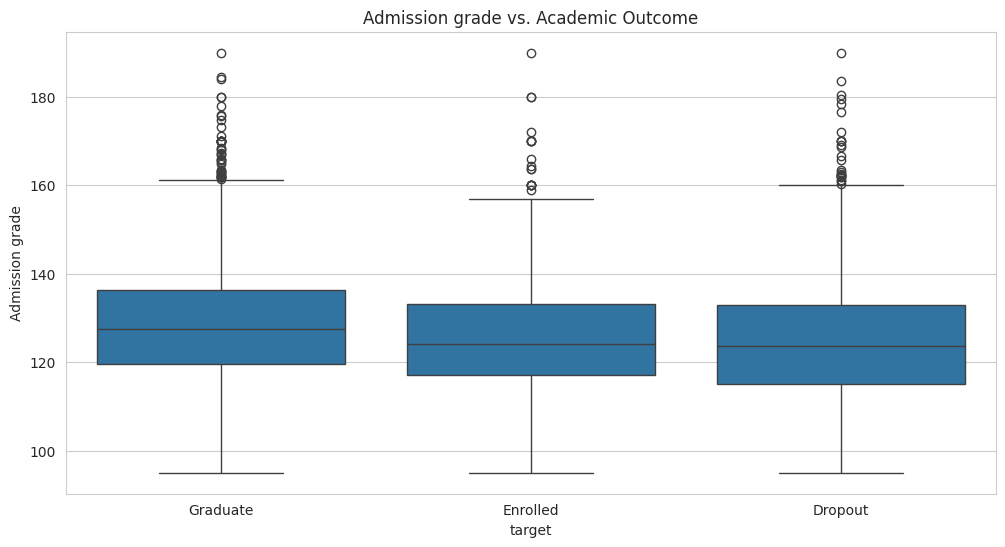

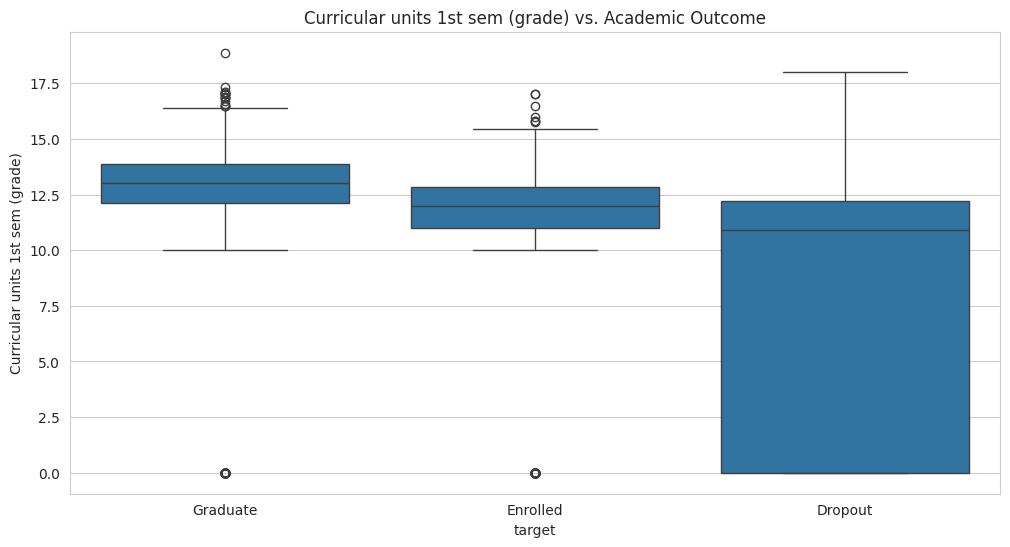

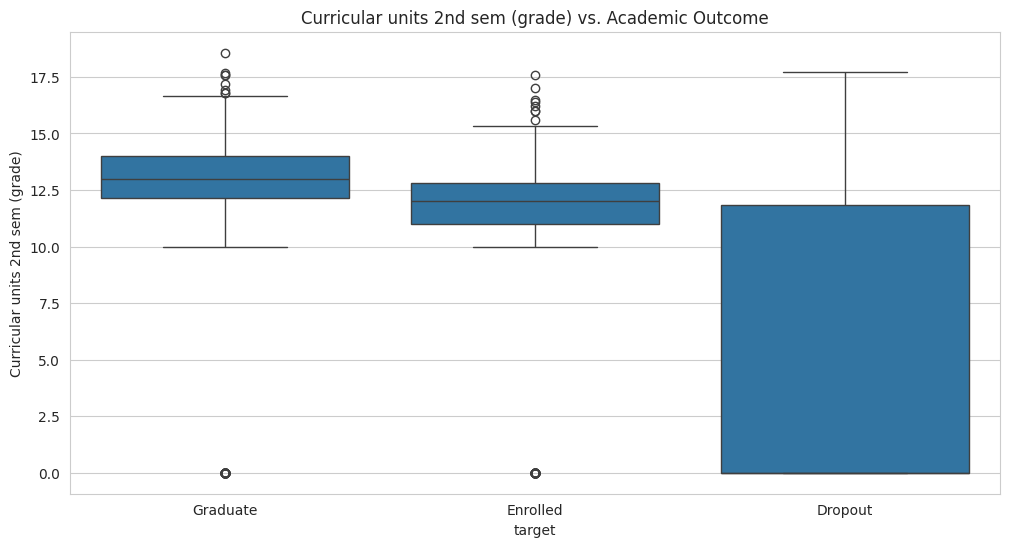

In [ ]:
numerical_features = ['Age at enrollment', 
                      'Admission grade', 
                      'Curricular units 1st sem (grade)', 
                      'Curricular units 2nd sem (grade)']

for col in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=TARGET_COL, y=col, data=df, order=['Graduate', 'Enrolled', 'Dropout'])
    plt.title(f'{col} vs Academic Outcome')
    plt.show()

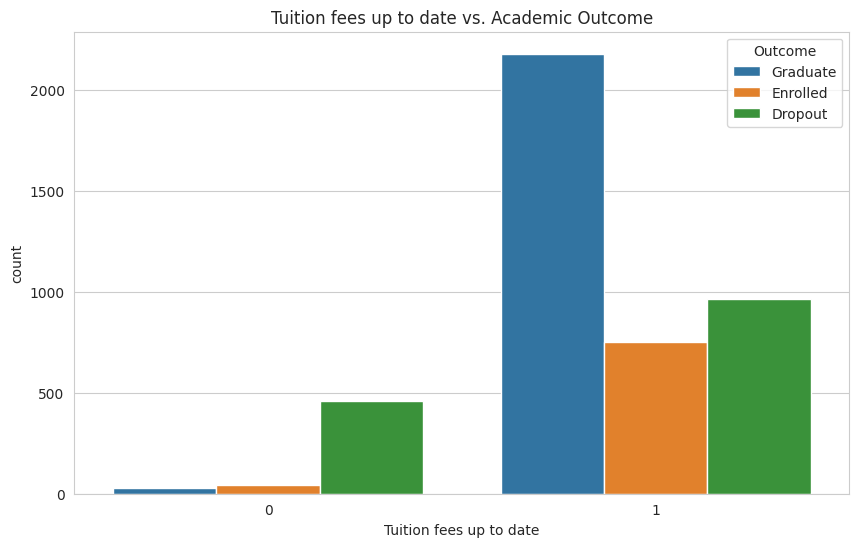

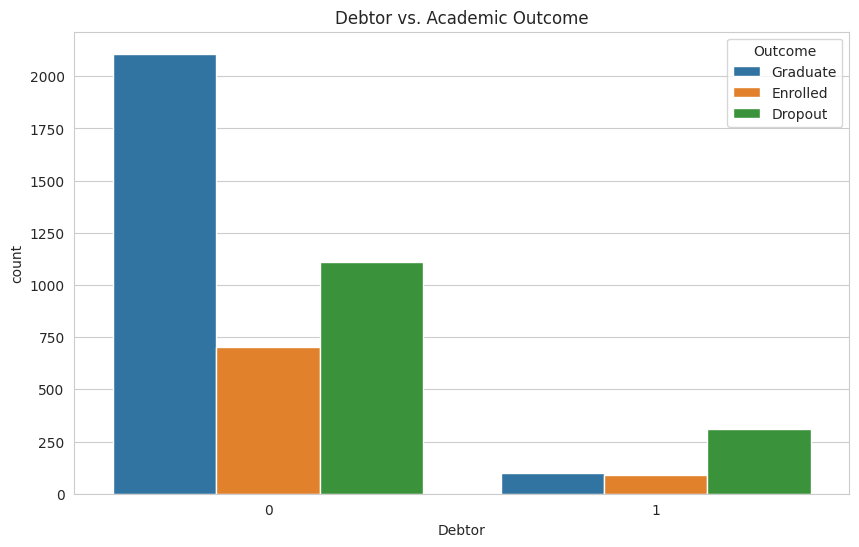

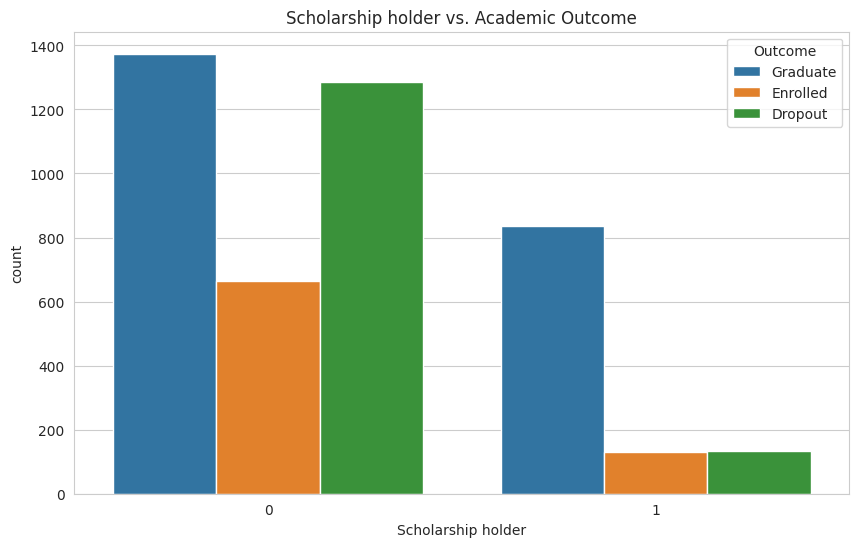

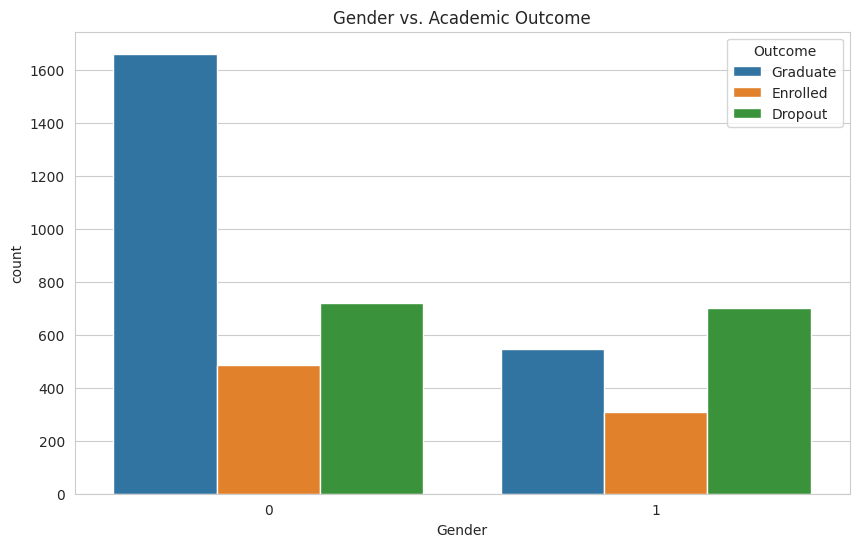

In [10]:
categorical_features = ['Tuition fees up to date', 'Debtor', 'Scholarship holder', 'Gender']

for col in categorical_features:
    # Create a 'hue' plot to see the target distribution within each category
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue=TARGET_COL, data=df, hue_order=['Graduate', 'Enrolled', 'Dropout'])
    plt.title(f'{col} vs. Academic Outcome')
    plt.legend(title='Outcome')
    plt.show()

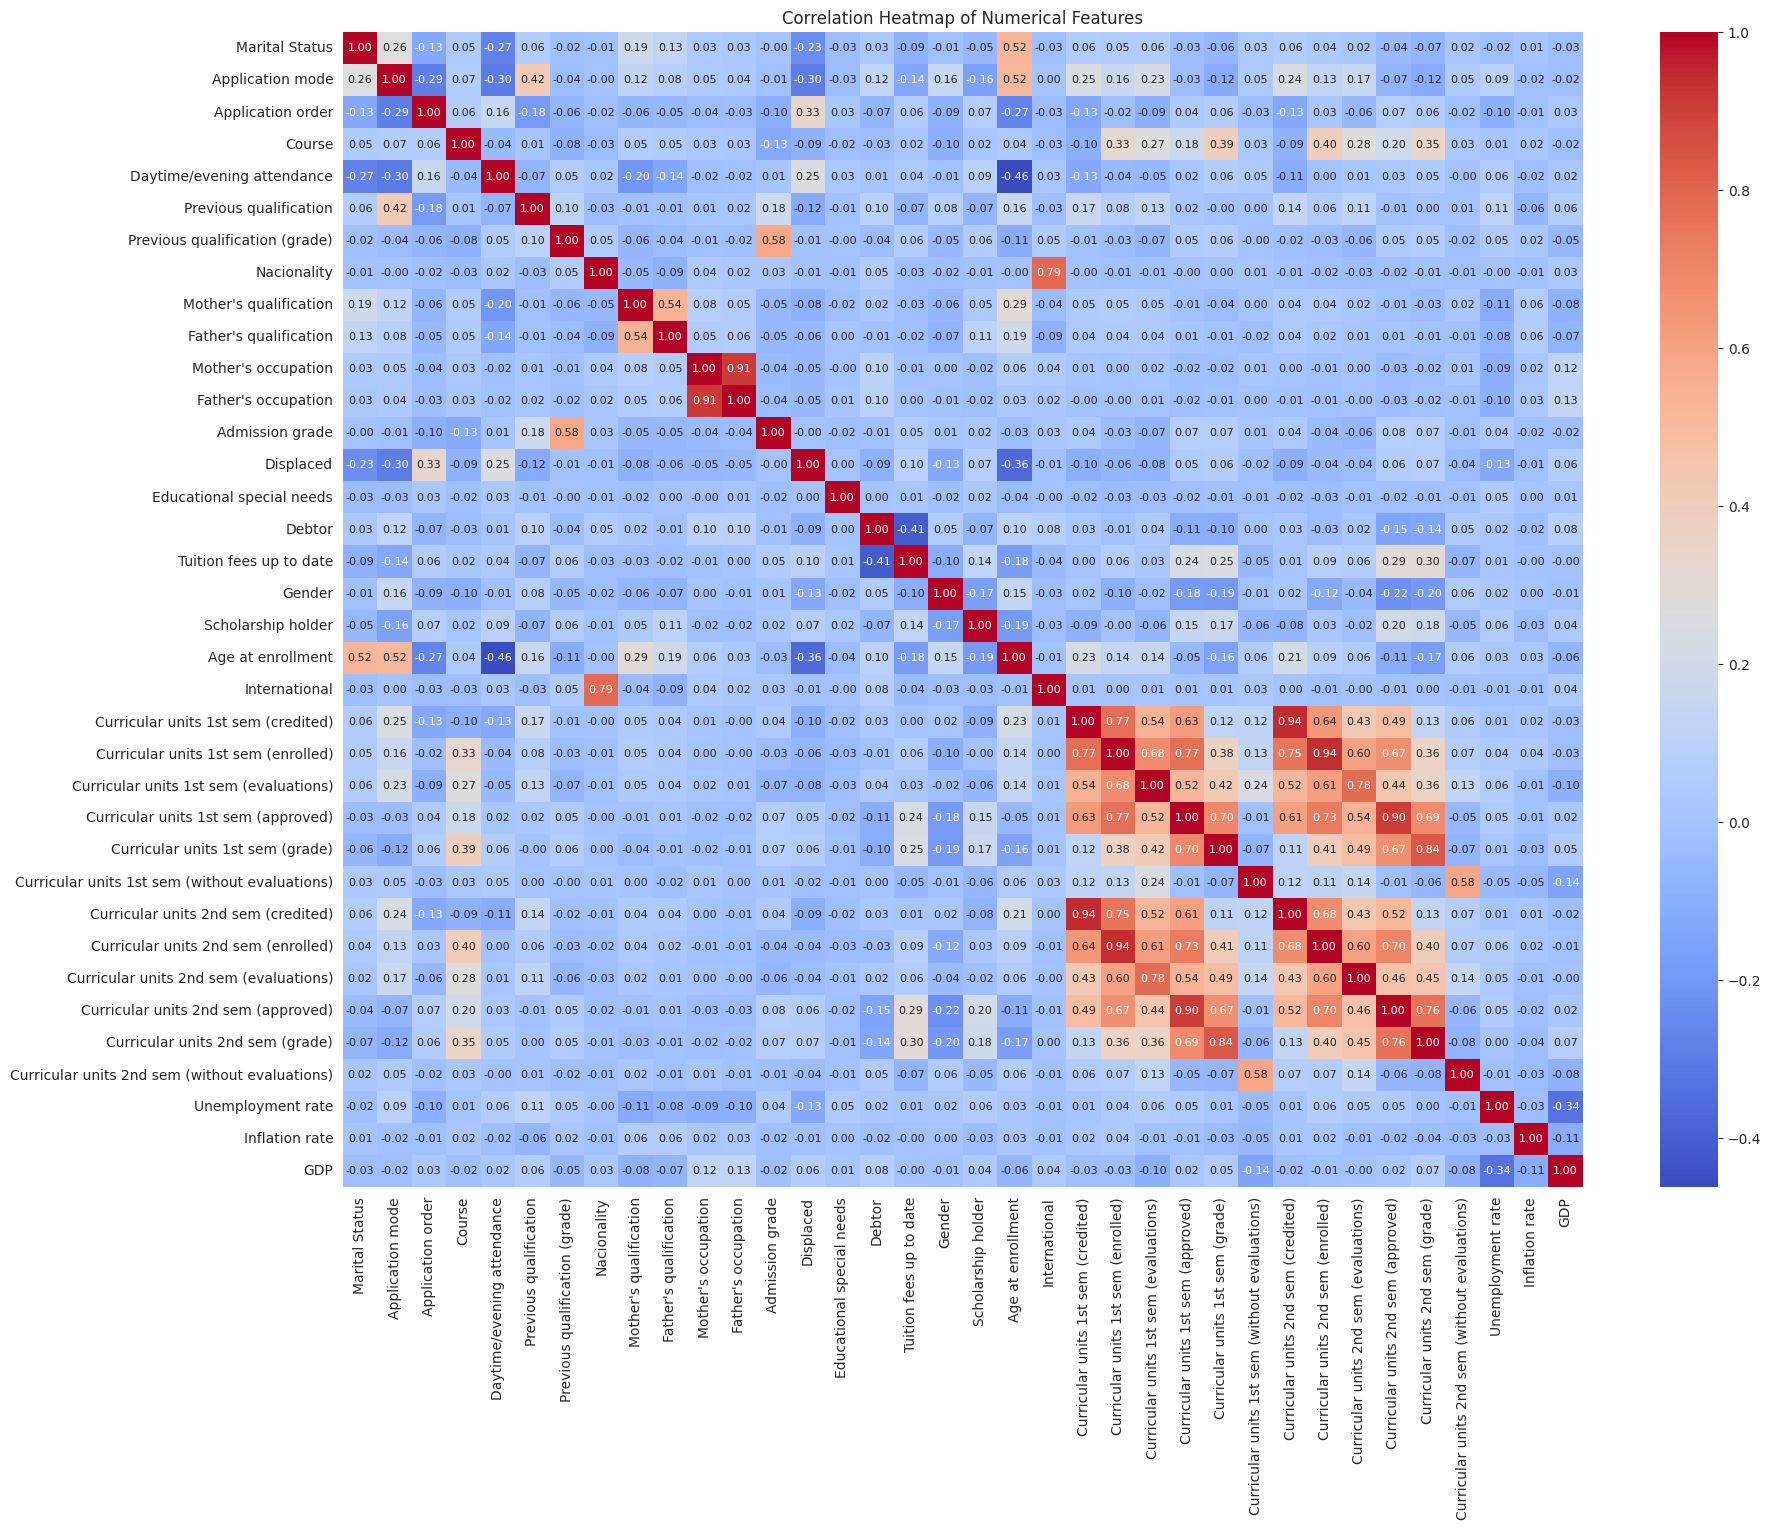

In [ ]:
# Using only numerical columns to check for correlation
numerical_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(20, 15))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

PHASE TWO

In [ ]:
#!pip install scikit-learn imbalanced-learn joblib
#if you're not using a virtual environment

In [13]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib
import os
from collections import Counter

# I reloaded the data just in case to make this section self contained
file_path = '../data/students_dropout_academic_success.csv'
df = pd.read_csv(file_path, sep=',')

TARGET_COL = 'target'

print("Libraries and data reloaded for preprocessing.")

Libraries and data re-loaded for preprocessing.


In [ ]:
# Separating features X and target y
y = df[TARGET_COL]
X = df.drop(TARGET_COL, axis=1)

# Creating a LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"LabelEncoder classes: {le.classes_}")

# Creating 'models' directory and saving the encoder
os.makedirs('../models', exist_ok=True)
joblib.dump(le, '../models/label_encoder.joblib')
print(" LabelEncoder saved to '../models/label_encoder.joblib' ")

LabelEncoder classes: ['Dropout' 'Enrolled' 'Graduate']
 LabelEncoder saved to '../models/label_encoder.joblib' 


In [ ]:
# List of all numerical features
numerical_cols = [
    'Application order', 'Age at enrollment', 'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# List of all categorical features
categorical_cols = [
    'Marital Status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', "Mother's qualification",
    "Father's qualification", "Mother's occupation", "Father's occupation",
    'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]

# check
print(f"Total features: {len(numerical_cols) + len(categorical_cols)}")
print(f"Total columns in X: {len(X.columns)}")

Total features: 36
Total columns in X: 36


Creating a pipeline for the numerical features to be scaled, for the categorical features to be encoded and also for the master processor to apply the right tranformer to the right columns.

In [ ]:
# num. feature
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# cat. feature
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# master preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ],
    remainder='drop' # Droping any columns I didn't explicitly list
)

print("Column Transformer preprocessor created successfully.")

ColumnTransformer preprocessor created successfully.


In [ ]:
#print(X_train.columns)
#If you want to take a like at it

Spliting the dataset

In [ ]:
# 'stratify=y_encoded' is CRITICAL for imbalanced datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print(f"Original X shape: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("\nOriginal Target Distribution:")
print(Counter(y_encoded))
print("\nTraining Target Distribution:")
print(Counter(y_train))
print("\nTesting Target Distribution:")
print(Counter(y_test))

Original X shape: (4424, 36)
X_train shape: (3539, 36)
X_test shape: (885, 36)

Original Target Distribution:
Counter({np.int64(2): 2209, np.int64(0): 1421, np.int64(1): 794})

Training Target Distribution (Should be proportional):
Counter({np.int64(2): 1767, np.int64(0): 1137, np.int64(1): 635})

Testing Target Distribution (Should be proportional):V
Counter({np.int64(2): 442, np.int64(0): 284, np.int64(1): 159})


1. Applying the preprocessing pipeline to the training data and test data.
2. Applying SMOTE to the processed training data

In [ ]:
print("Applying preprocessing pipeline to training data...")
X_train_processed = preprocessor.fit_transform(X_train)

print("Applying preprocessing pipeline to test data...")
X_test_processed = preprocessor.transform(X_test)

print(f"\nShape of processed X_train: {X_train_processed.shape}")
print(f"Shape of processed X_test: {X_test_processed.shape}")
# Note: The number of columns has increased due to one hot encoding


print("\nApplying SMOTE to training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("\nDistribution BEFORE SMOTE (Training Data):")
print(Counter(y_train))
print("\nDistribution AFTER SMOTE (Training Data):")
print(Counter(y_train_resampled))
print("All classes are now balanced in the training set.")

Applying preprocessing to training data...
Applying preprocessing to test data...

Shape of processed X_train: (3539, 244)
Shape of processed X_test: (885, 244)

Applying SMOTE to training data...

Distribution BEFORE SMOTE (Training Data):
Counter({np.int64(2): 1767, np.int64(0): 1137, np.int64(1): 635})

Distribution AFTER SMOTE (Training Data):
Counter({np.int64(2): 1767, np.int64(0): 1767, np.int64(1): 1767})
All classes are now balanced in the training set.


1. Save the preprocessor
2. Create a new directory for our clean data/preprocessed data
3. Save the final, processed, and resampled arrays

In [ ]:
joblib.dump(preprocessor, '../models/preprocessor.joblib')
print("\nPreprocessor pipeline saved to '../models/preprocessor.joblib'")

os.makedirs('../data/processed', exist_ok=True)

# numpy's .npy format is efficient for array storage
np.save('../data/processed/X_train_resampled.npy', X_train_resampled)
np.save('../data/processed/y_train_resampled.npy', y_train_resampled)
np.save('../data/processed/X_test_processed.npy', X_test_processed)
np.save('../data/processed/y_test.npy', y_test)

print("Processed and resampled data saved to '../data/processed/'")


Preprocessor pipeline saved to '../models/preprocessor.joblib'
Processed and resampled data saved to '../data/processed/'
